In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import IPython.display as ipd
import iverb
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def plot_signal(x, sr):
    time = np.arange(0, len(x) / sr, 1/sr)
    plt.plot(time, x, linewidth=0.5)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")

In [21]:
fpath = "/Users/maxhenry/Documents/Matlab/eers-audio-toolbox/audio/speech_REF.wav"
x, sr = iverb.util.audioread(fpath)

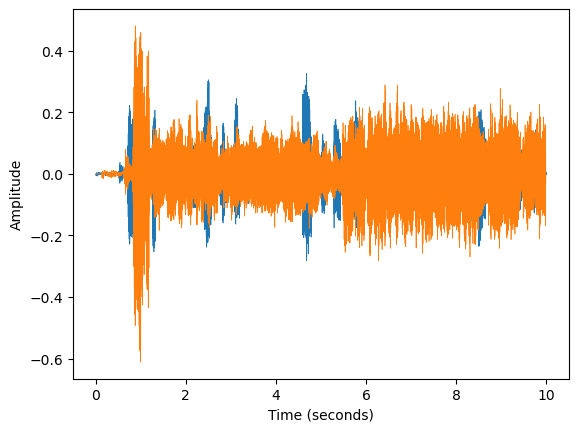

In [26]:
block_size = 2048

frame_size = 1024
num_overlap = 4

buffer = iverb.PhaseFreezer(frame_size, num_overlap, -25)

num_blocks = len(x) // block_size

y = []
p_in = 0
p_out = p_in + block_size
for i in range(num_blocks):
    block = x[p_in:p_out].copy()

    block = buffer.process_block(block)

    y.append(block)

    p_in += block_size
    p_out += block_size

y = np.concatenate(y)

plot_signal(x, sr)
plot_signal(y, sr)

plt.show()

ipd.display(ipd.Audio(x, rate=sr))
ipd.display(ipd.Audio(y, rate=sr))
